In [855]:
import dill
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans 
from sklearn.metrics import silhouette_score
import pandas as pd
import seaborn as sns
import glob

In [856]:
data_dir = "../Data/"
fig_dir = "../Figures/"

In [857]:
all_files = glob.glob(data_dir+"model_means_*.csv")

In [858]:
features = ["decision_time","probability_optimal_action","probability_reward"]

In [859]:
all_files

['../Data/model_means_5.csv',
 '../Data/model_means_6.csv',
 '../Data/model_means_8.csv',
 '../Data/model_means_4.csv',
 '../Data/model_means_1.csv',
 '../Data/model_means_7.csv',
 '../Data/model_means_2.csv',
 '../Data/model_means_9.csv']

In [860]:
animal_ids = []

In [861]:
all_state_nums = pd.DataFrame()
all_means = []
for f in all_files:
    mu = pd.read_csv(f)
    mu["state_num"] = np.arange(0,len(mu))
    all_state_nums = pd.concat([all_state_nums,mu ])
    all_means.append(np.array(mu[features]))
all_state_nums = all_state_nums.reset_index()

In [862]:
all_state_nums

,index,Unnamed: 0,decision_time,probability_optimal_action,probability_reward,animal_id,state_num
0,0,0,-0.123250,0.636119,0.504139,5,0
1,1,1,-0.127431,0.684806,0.704327,5,1
2,2,2,0.735985,0.481508,0.524195,5,2
3,3,3,0.002546,0.975683,0.979938,5,3
4,4,4,-0.033528,0.465241,0.464376,5,4
5,5,5,-0.080322,0.445758,0.200291,5,5
6,6,6,-0.010148,0.849341,0.879603,5,6
7,7,7,-0.030279,0.508724,0.508710,5,7
8,0,0,-0.096676,0.685797,0.685593,6,0
9,1,1,0.608391,0.627901,0.545804,6,1


In [863]:
mu

,Unnamed: 0,decision_time,probability_optimal_action,probability_reward,animal_id,state_num
0,0,-0.048087,0.741421,0.740202,9,0
1,1,-0.049410,0.970976,0.970957,9,1
2,2,-0.043877,0.658367,0.496088,9,2
3,3,0.057256,0.617862,0.617796,9,3
4,4,0.156200,0.659450,0.655419,9,4
5,5,-0.083349,0.984589,0.695188,9,5


In [864]:
np.array(mu[features])

array([[-0.04808659,  0.74142143,  0.74020214],
       [-0.04940962,  0.97097608,  0.97095747],
       [-0.04387692,  0.65836699,  0.49608768],
       [ 0.05725555,  0.61786193,  0.6177956 ],
       [ 0.1561999 ,  0.6594503 ,  0.65541924],
       [-0.08334902,  0.98458946,  0.69518791]])

In [865]:
# means = best_model.means_.copy()

In [866]:
# indiv_mouse = mouse_data.loc[(mouse_data["animal_id"] == 9)]
# indiv_mouse = indiv_mouse.loc[indiv_mouse["RT(ms)"]<=np.percentile(indiv_mouse["RT(ms)"], 95)]

In [867]:
# max_dt = np.max(indiv_mouse['RT(ms)'])

In [868]:
# max_dt

In [869]:
# for m in means:
#     print(m[0])
#     m[0] = m[0]/max_dt
#     print(m[0])

In [870]:
# all_means.append(means)

In [871]:
len(np.vstack(all_means))

38

In [872]:
np.vstack(all_means)

array([[-1.23250204e-01,  6.36118989e-01,  5.04139368e-01],
       [-1.27431409e-01,  6.84806272e-01,  7.04327374e-01],
       [ 7.35985368e-01,  4.81507788e-01,  5.24194960e-01],
       [ 2.54620422e-03,  9.75683401e-01,  9.79937964e-01],
       [-3.35276022e-02,  4.65241140e-01,  4.64376297e-01],
       [-8.03217900e-02,  4.45757890e-01,  2.00291358e-01],
       [-1.01483983e-02,  8.49341082e-01,  8.79602872e-01],
       [-3.02788679e-02,  5.08723623e-01,  5.08709735e-01],
       [-9.66764927e-02,  6.85796874e-01,  6.85592604e-01],
       [ 6.08391336e-01,  6.27901116e-01,  5.45804386e-01],
       [-3.37971016e-01,  7.70130076e-01,  6.16491671e-01],
       [-2.09733417e-01,  8.09370210e-01,  6.82142260e-01],
       [-1.55052420e-01,  9.93427875e-01,  8.48380057e-01],
       [ 3.56910672e-01,  5.55728840e-01,  5.28248087e-01],
       [ 1.34262971e-02,  9.83386009e-01,  7.06605156e-01],
       [-1.21017299e-01,  9.90693198e-01,  9.89559103e-01],
       [ 2.12384371e-02,  6.14123555e-01

In [873]:
bruh = np.vstack(all_means)

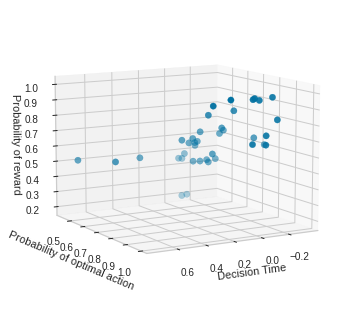

In [874]:
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.scatter3D(bruh[:, 0], bruh[:, 1], bruh[:, 2], s=40)
ax.set_xlabel('Decision Time')
ax.set_ylabel('Probability of optimal action')
ax.set_zlabel('Probability of reward')
ax.view_init(azim=60,elev=10)

k value : 2, centers : [[ 0.05487544  0.59619401  0.53736736]
 [-0.03339407  0.91983032  0.84353414]]
k value : 3, centers : [[-0.04499754  0.62470636  0.55652339]
 [ 0.00790666  0.95637775  0.88451466]
 [ 0.56709579  0.55504591  0.53274914]]
k value : 4, centers : [[-0.03866935  0.66954549  0.60927111]
 [ 0.56709579  0.55504591  0.53274914]
 [ 0.00790666  0.95637775  0.88451466]
 [-0.06777901  0.4632855   0.3666316 ]]
k value : 5, centers : [[ 0.56709579  0.55504591  0.53274914]
 [ 0.0066837   0.63350126  0.57477383]
 [ 0.01620263  0.95381305  0.90172619]
 [-0.07715404  0.45192596  0.33111206]
 [-0.15054132  0.77935239  0.68732399]]
k value : 6, centers : [[-0.16397978  0.73830497  0.68575121]
 [ 0.00952697  0.64309953  0.57985569]
 [ 0.04925493  0.9402587   0.95098848]
 [ 0.56709579  0.55504591  0.53274914]
 [-0.06777901  0.4632855   0.3666316 ]
 [-0.07478989  0.98861587  0.75156704]]
k value : 7, centers : [[-0.03941834  0.57866993  0.50183584]
 [ 0.04925493  0.9402587   0.95098848]

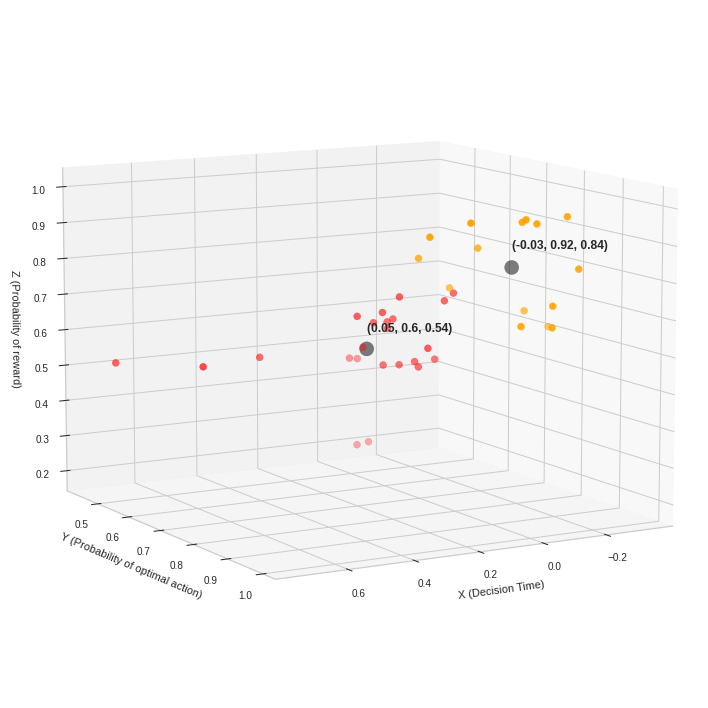

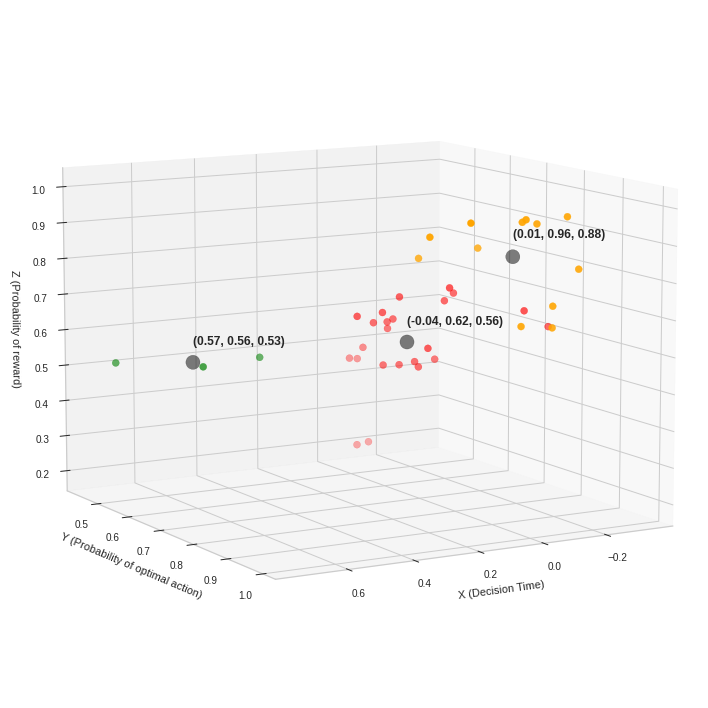

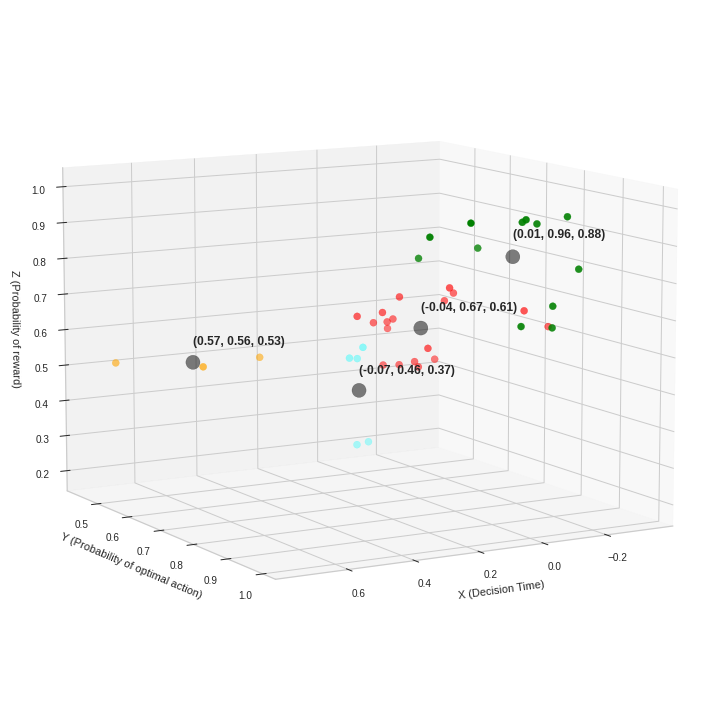

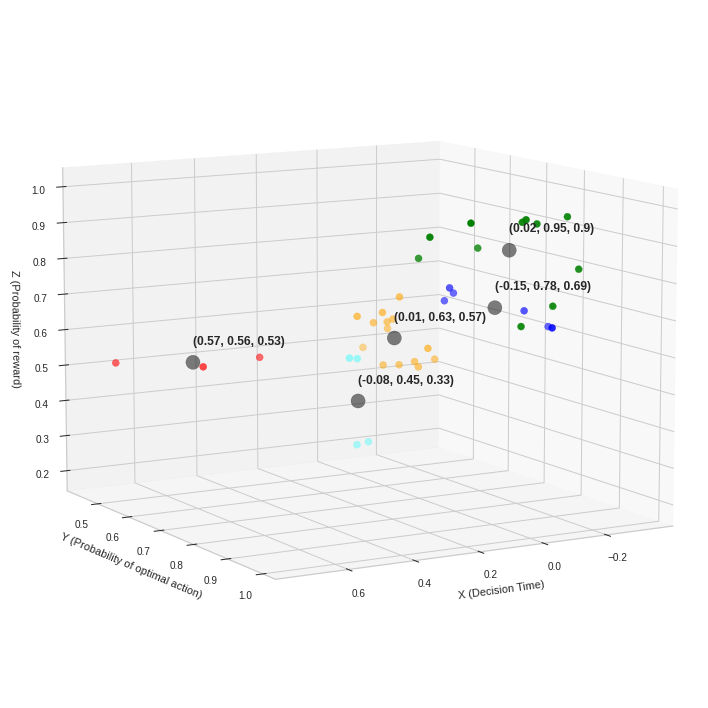

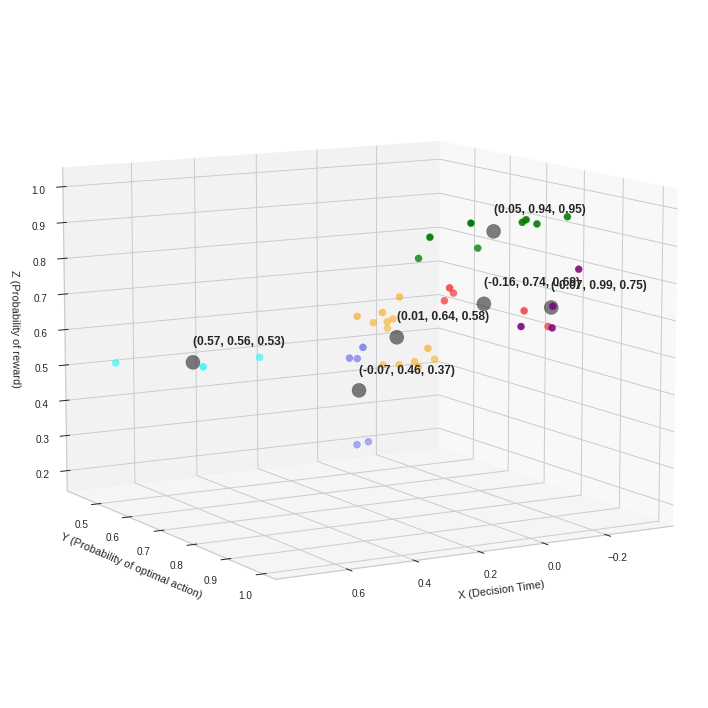

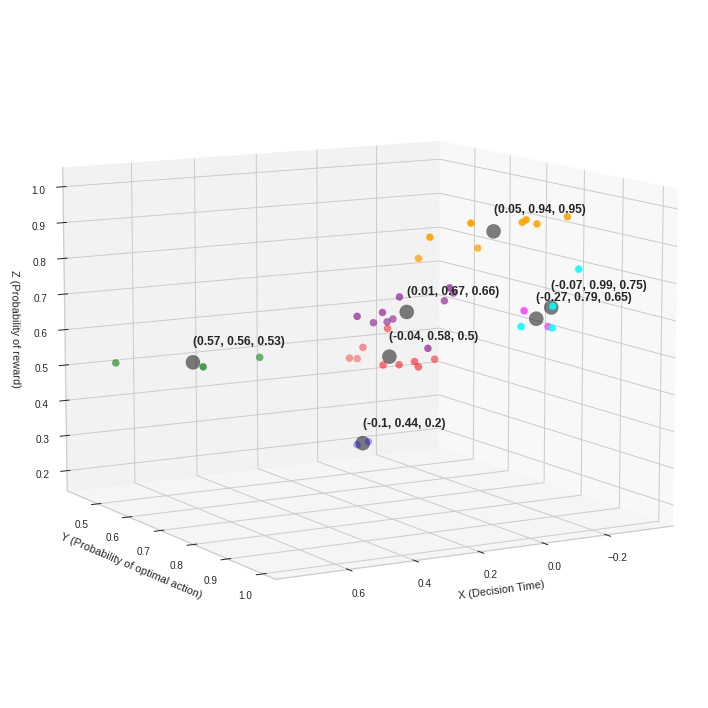

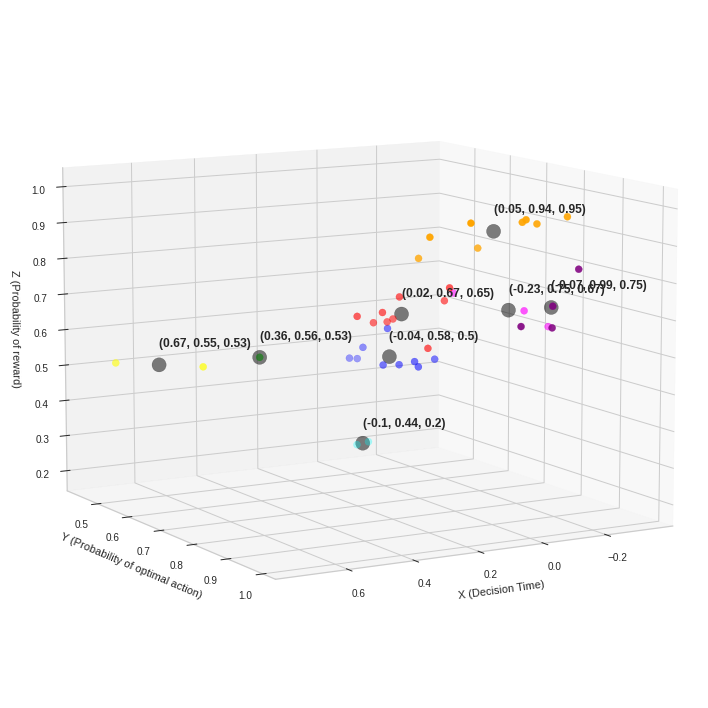

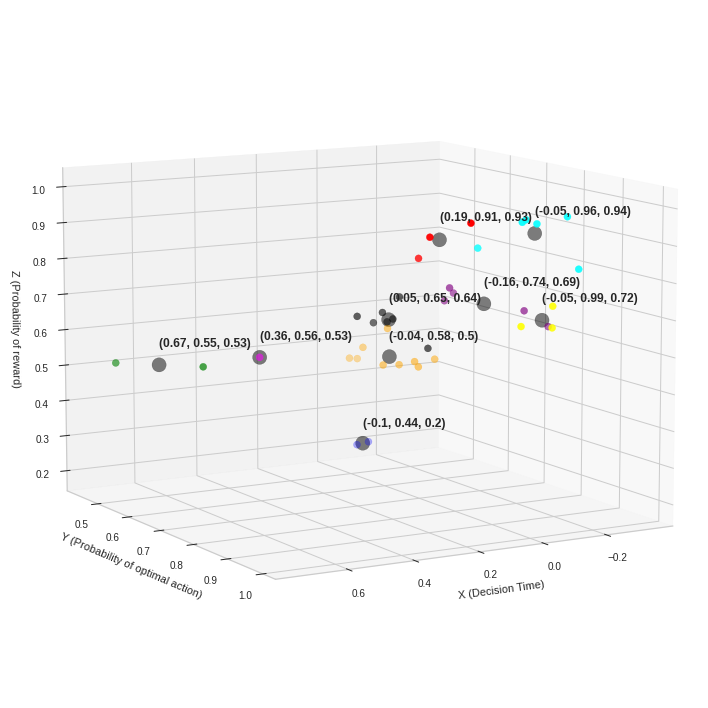

In [875]:
k_values = range(2, 10)
inertias = []
silhouette_scores = []
LABEL_COLOR_MAP = {0 : 'red',
                   1 : 'orange',
                   2 : 'green', 
                   3 : 'cyan', 
                   4 : 'blue',
                   5 : 'purple',
                   6 : 'magenta',
                   7 : 'yellow',
                   8 : 'black'}

for k in k_values: 
    k_model = KMeans(n_clusters=k).fit(bruh)
    k_model.fit(bruh)
    silhouette_scores.append(silhouette_score(bruh, k_model.labels_, metric='euclidean'))
    inertias.append(k_model.inertia_)
    y_means = k_model.predict(bruh)

    fig = plt.figure(figsize=(10,10))
    ax = plt.axes(projection='3d')
    label_color = [LABEL_COLOR_MAP[l] for l in y_means]
    ax.scatter3D(bruh[:, 0], bruh[:, 1], bruh[:, 2], c=label_color, s=50)
    centers = k_model.cluster_centers_
    print(f"k value : {k}, centers : {centers}")
    #for i in np.arange(len(centers)):
    ax.scatter3D(centers[:, 0], centers[:, 1], centers[:, 2], s=200, c='black', alpha=0.5)
    for i in np.arange(len(centers)):
        num = np.round(centers[i],2).astype(str)
        txt = ", ".join(num)
        txt1 = "("+txt+")"
        ax.text(centers[i][0],centers[i][1],centers[i][2]+0.05,txt1,fontsize=12,fontweight='bold')
    ax.set_xlabel('X (Decision Time)',labelpad=10)
    ax.set_ylabel('Y (Probability of optimal action)',labelpad=10)
    ax.set_zlabel('Z (Probability of reward)',labelpad=10)
    ax.view_init(elev=10,azim=60)
    plt.tight_layout()
    fig.savefig(fig_dir+"clustering_hmm_means_"+str(k)+".png")

In [876]:
 silhouette_scores

[0.41386572162141894,
 0.5002568821189309,
 0.4325130114209137,
 0.3764963243812915,
 0.3868881586692698,
 0.3984520479298218,
 0.36136449112686003,
 0.39708271616236995]

In [877]:
txt1

'(0.05, 0.65, 0.64)'

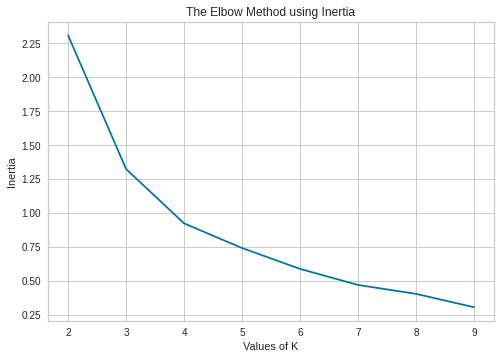

In [878]:
plt.plot(k_values, inertias, 'bx-')
plt.xlabel('Values of K')
plt.ylabel('Inertia')
plt.title('The Elbow Method using Inertia')
plt.show()

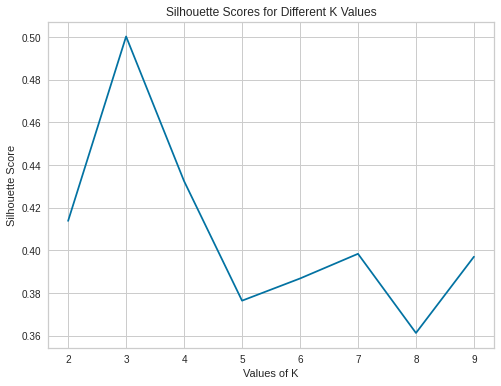

In [879]:
fig,ax = plt.subplots(1,1,figsize=(8,6))
ax.plot(k_values, silhouette_scores, 'bx-')
ax.set_xlabel('Values of K')
ax.set_ylabel('Silhouette Score')
ax.set_title('Silhouette Scores for Different K Values')
# plt.show()
fig.savefig(fig_dir+"silhoutte_scores_vs_num_clusters_test.png")

In [880]:
num_clus = np.arange(2,10)[np.argmax(silhouette_scores)]

In [881]:
k_model = KMeans(n_clusters=num_clus).fit(bruh)
k_model.fit(bruh)


KMeans(n_clusters=3)

In [882]:
k_model.cluster_centers_

array([[ 0.00790666,  0.95637775,  0.88451466],
       [-0.04499754,  0.62470636,  0.55652339],
       [ 0.56709579,  0.55504591,  0.53274914]])

In [905]:
# Cluster names human annotation
clus_names = dict()
clus_names[0] = "Avg DT, High optimal action, High reward"
clus_names[1] = "Fast DT, Low optimal action, Low reward"
clus_names[2] = "Slow DT, Low optimal action, Low reward"

clus_names_short = dict()
clus_names_short[0] = "Exploitation"
clus_names_short[1] = "Fast exploration"
clus_names_short[2] = "Slow exploration"


In [906]:
k_model.labels_

array([1, 1, 2, 0, 1, 1, 0, 1, 1, 2, 1, 1, 0, 2, 0, 0, 1, 1, 1, 0, 1, 0,
       1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0], dtype=int32)

In [907]:
all_state_nums["kmean_label"] = k_model.labels_

In [908]:
all_state_nums.loc[all_state_nums["animal_id"]==dat.animal_id.unique()[0]]

,index,Unnamed: 0,decision_time,probability_optimal_action,probability_reward,animal_id,state_num,kmean_label
32,0,0,-0.048087,0.741421,0.740202,9,0,1
33,1,1,-0.049410,0.970976,0.970957,9,1,0
34,2,2,-0.043877,0.658367,0.496088,9,2,1
35,3,3,0.057256,0.617862,0.617796,9,3,1
36,4,4,0.156200,0.659450,0.655419,9,4,1
37,5,5,-0.083349,0.984589,0.695188,9,5,0


In [909]:
md_files = glob.glob(data_dir+"mouse_data_with_states*.csv")
md_files

['../Data/mouse_data_with_states_1.csv',
 '../Data/mouse_data_with_states_9.csv',
 '../Data/mouse_data_with_states_7.csv',
 '../Data/mouse_data_with_states_4.csv',
 '../Data/mouse_data_with_states_2.csv',
 '../Data/mouse_data_with_states_6.csv',
 '../Data/mouse_data_with_states_8.csv',
 '../Data/mouse_data_with_states_5.csv']

In [910]:
dat

,Unnamed: 0.1,Unnamed: 0,level_0,index,conflict,condition,volatility,event_marker,block,reward_probability,...,conflict + volatility,dec_time_robust_scaled,block_change,optimal_action_mv,reward_mv,dec_time_mv,state,kmean_label,state_name,state_name(short)
0,206438,206438,1,23402,No,iSPN-Control,Low,8.0,left,0-90,...,No - Low,-0.601494,0,0.000000,0.000000,-0.601494,3,1,"Fast DT, Low optimal action, Low reward",Exploitation
1,206439,206439,2,23403,No,iSPN-Control,Low,8.0,left,0-90,...,No - Low,0.107949,0,0.000000,0.000000,-0.158092,3,1,"Fast DT, Low optimal action, Low reward",Exploitation
2,206440,206440,3,23404,No,iSPN-Control,Low,8.0,left,0-90,...,No - Low,0.251030,0,0.000000,0.000000,0.050644,3,1,"Fast DT, Low optimal action, Low reward",Exploitation
3,206441,206441,4,23405,No,iSPN-Control,Low,8.0,left,0-90,...,No - Low,0.877009,0,0.000000,0.000000,0.430407,3,1,"Fast DT, Low optimal action, Low reward",Exploitation
4,206442,206442,5,23406,No,iSPN-Control,Low,1.0,left,0-90,...,No - Low,-0.753517,0,0.433727,0.433727,-0.083092,3,1,"Fast DT, Low optimal action, Low reward",Exploitation
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3640,210461,210461,4024,27581,No,iSPN-Control,Low,5.0,right,0-90,...,No - Low,-0.440528,0,0.746070,0.602649,-0.076650,2,1,"Fast DT, Low optimal action, Low reward",Exploitation
3641,210462,210462,4025,27582,No,iSPN-Control,Low,4.0,right,0-90,...,No - Low,0.417958,0,0.447642,0.361589,0.121193,2,1,"Fast DT, Low optimal action, Low reward",Exploitation
3642,210463,210463,4026,27583,No,iSPN-Control,Low,4.0,right,0-90,...,No - Low,0.826335,0,0.268585,0.216954,0.403250,4,1,"Fast DT, Low optimal action, Low reward",Exploitation
3643,210464,210464,4027,27584,No,iSPN-Control,Low,4.0,right,0-90,...,No - Low,0.766718,0,0.161151,0.130172,0.548637,4,1,"Fast DT, Low optimal action, Low reward",Exploitation


In [911]:
all_mice_data_kmeans_clus_names = pd.DataFrame()
for mf in md_files:
    dat = pd.read_csv(mf)
    ref = all_state_nums.loc[all_state_nums["animal_id"]==dat.animal_id.unique()[0]]
    dat["kmean_label"] = [ ref.loc[ref['state_num']==x]['kmean_label'].values[0]   for x in dat.state.values]
    dat["state_name"] = [clus_names[x]  for x in dat.kmean_label.values]
    dat["state_name(short)"] = [clus_names_short[x]  for x in dat.kmean_label.values]
    all_mice_data_kmeans_clus_names = pd.concat([all_mice_data_kmeans_clus_names,dat])


In [912]:
all_mice_data_kmeans_clus_names.to_csv(data_dir+"all_mice_data_with_kmean_labels.csv")

In [913]:
time_spent_state = pd.DataFrame()
for grp in all_mice_data_kmeans_clus_names.groupby('animal_id'):
    dat = grp[1].copy()
    sub_dat = (dat.groupby('state_name(short)').count()/len(dat)).reset_index()[['state_name','kmean_label','state_name(short)']]
    sub_dat = sub_dat.rename(columns={'kmean_label':'trials(%)'})
    sub_dat['animal_id'] = grp[0]
    time_spent_state = pd.concat([time_spent_state, sub_dat])


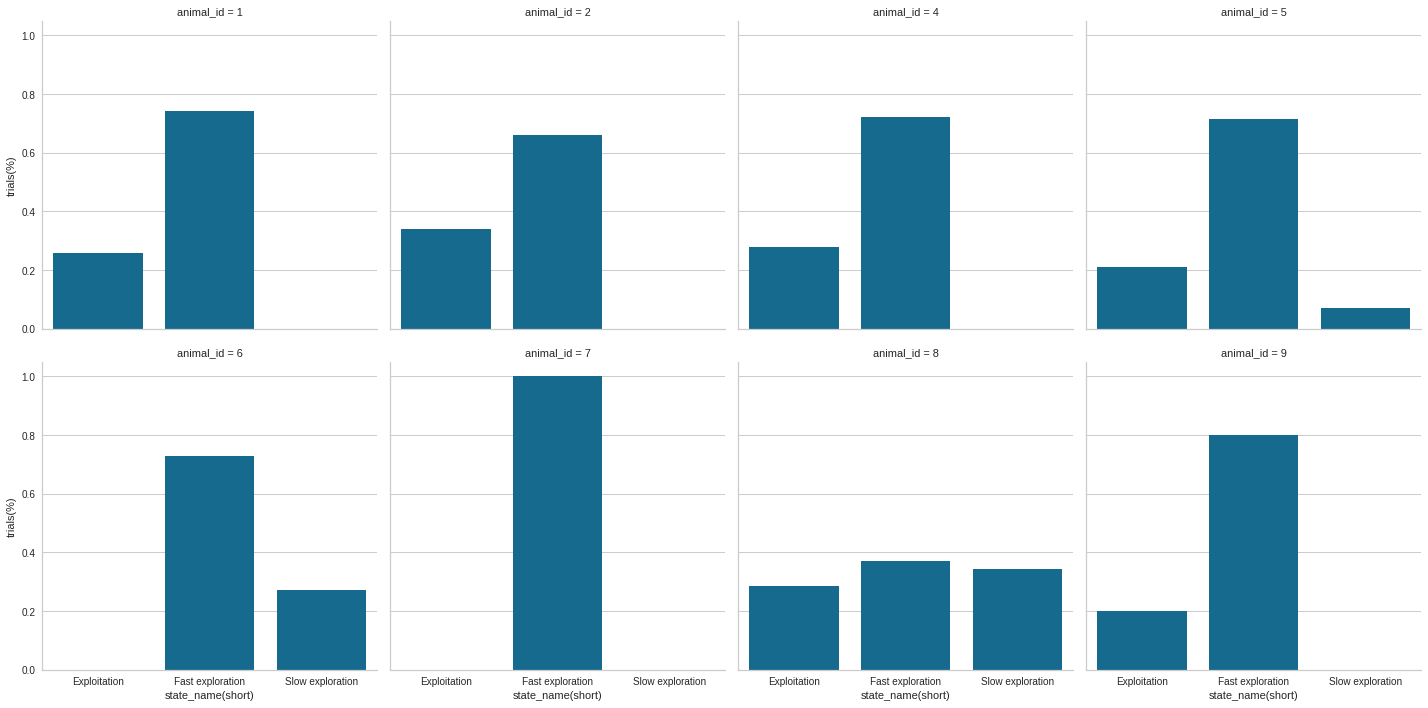

In [914]:
g1 = sns.catplot(x="state_name(short)",y="trials(%)",col='animal_id',data=time_spent_state,kind='bar',col_wrap=4)
plt.tight_layout()
g1.savefig(fig_dir+"time_spent_state_animal_separate.png")
# sns.boxenplot(x="state_name",y="trials(%)",data=time_spent_state)

/tmp/ipykernel_325698/197104094.py:4: MatplotlibDeprecationWarning: Support for passing numbers through unit converters is deprecated since 3.5 and support will be removed two minor releases later; use Axis.convert_units instead.
  plt.tight_layout()
/tmp/ipykernel_325698/197104094.py:4: MatplotlibDeprecationWarning: Support for passing numbers through unit converters is deprecated since 3.5 and support will be removed two minor releases later; use Axis.convert_units instead.
  plt.tight_layout()
/tmp/ipykernel_325698/197104094.py:4: MatplotlibDeprecationWarning: Support for passing numbers through unit converters is deprecated since 3.5 and support will be removed two minor releases later; use Axis.convert_units instead.
  plt.tight_layout()
/tmp/ipykernel_325698/197104094.py:4: MatplotlibDeprecationWarning: Support for passing numbers through unit converters is deprecated since 3.5 and support will be removed two minor releases later; use Axis.convert_units instead.
  plt.tight_layou

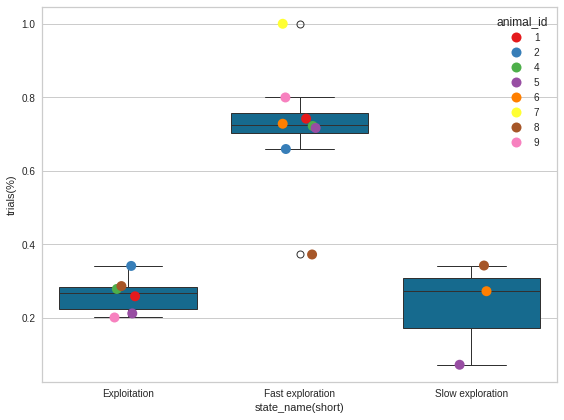

In [915]:
fig,ax = plt.subplots(1,1,figsize=(8,6))
sns.boxplot(x="state_name(short)",y="trials(%)",data=time_spent_state,ax=ax)
sns.stripplot(x="state_name(short)",y="trials(%)",data=time_spent_state,ax=ax,hue='animal_id',palette='Set1',s=10)
plt.tight_layout()
fig.savefig(fig_dir+"time_spent_state_pooled.png")

In [210]:
# from yellowbrick.cluster import SilhouetteVisualizer
 
# fig, ax = plt.subplots(4, 2, figsize=(15,8))
# for i in range(2, 10):
#     '''
#     Create KMeans instance for different number of clusters
#     '''
#     km = KMeans(n_clusters=i, init='k-means++', n_init=10, max_iter=100, random_state=42)
#     q, mod = divmod(i, 2)
#     '''
#     Create SilhouetteVisualizer instance with KMeans instance
#     Fit the visualizer
#     '''
#     visualizer = SilhouetteVisualizer(km, colors='yellowbrick', ax=ax[q-1][mod])
#     visualizer.fit(bruh) 